# Basic

### Project 1: Exploratory Data Analysis (EDA).

In [1]:
#loading dataset
import pandas as pd

# Load the Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Display the first few rows of the dataset
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [2]:
#descriptive statistics 
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
#handling Missing data
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df['Age'].fillna(df['Age'].median(),inplace=True)
df.drop(columns=['Cabin','Embarked'], inplace=True)

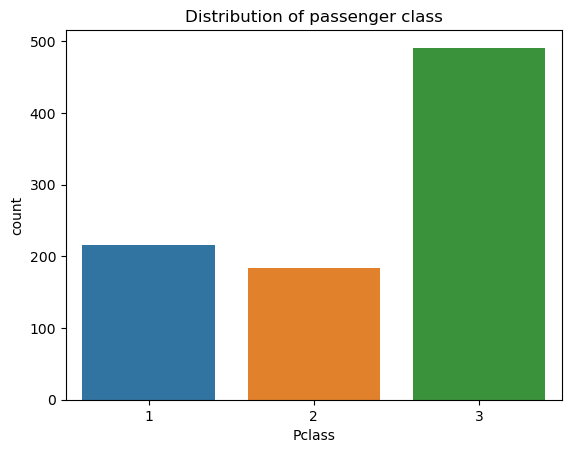

In [10]:
#Visualizing Passenger Class Distribution
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(data=df,x='Pclass')
plt.title('Distribution of passenger class')
plt.show() 

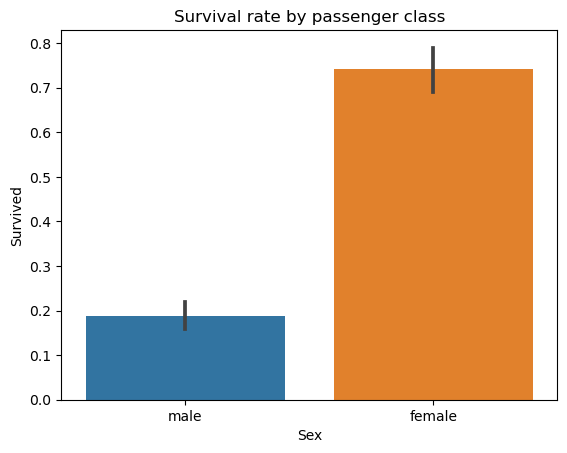

In [17]:
#Visualizing Survival Rate by Passenger Class:
sns.barplot(data=df,x='Pclass', y='Survived')
plt.title('Survival rate by passenger class')
plt.show()

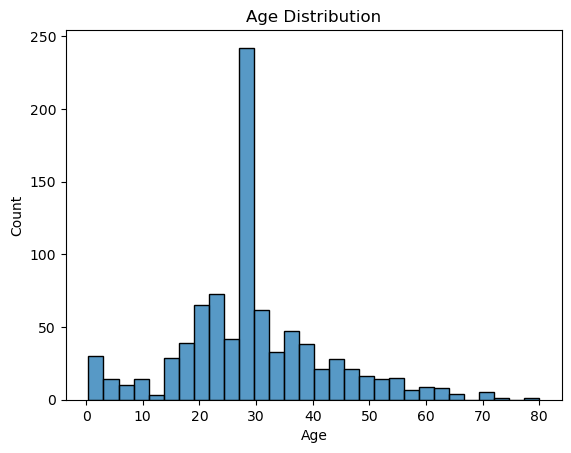

In [15]:
#Visualizing Age Distribution:
sns.histplot(data=df, x='Age')
plt.title("Age Distribution")
plt.show()

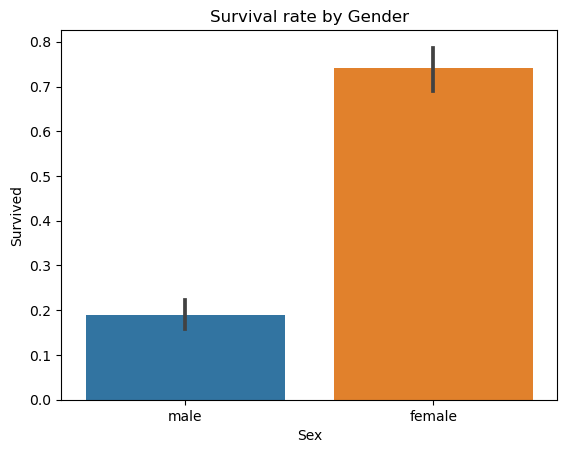

In [18]:
#Visualizing survival based on gender
sns.barplot(data=df,x='Sex', y='Survived')
plt.title('Survival rate by Gender')
plt.show()

# Project 2: Binary Logistic Regression for Classification

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
features=['Pclass','Age','Fare','SibSp','Parch','Sex']
df['Sex']=df['Sex'].apply(lambda x:1 if x == 'male' else 0)
X= df[features]
Y=df['Survived']

In [21]:
#splitting data into training and test sets
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.2, random_state=42)

In [22]:
print(X_train.head())

     Pclass   Age     Fare  SibSp  Parch  Sex
331       1  45.5  28.5000      0      0    1
733       2  23.0  13.0000      0      0    1
382       3  32.0   7.9250      0      0    1
704       3  26.0   7.8542      1      0    1
813       3   6.0  31.2750      4      2    0


In [27]:
#training the model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=200)#increasing iterations
model.fit(X_train, Y_train)

#make pridictions on test set
y_pred=model.predict(X_test)

In [29]:
#Evaluating the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Calculate the accuracy
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
conf_matrix = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification report (precision, recall, F1-score)
print("Classification Report:\n", classification_report(Y_test, y_pred))

Accuracy: 0.8100558659217877
Confusion Matrix:
 [[92 13]
 [21 53]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

